In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\BE\dmv\datasets\tele_com.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber opticalal,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        14 non-null     object 
 1   gender            14 non-null     object 
 2   SeniorCitizen     14 non-null     int64  
 3   Partner           14 non-null     object 
 4   Dependents        14 non-null     object 
 5   tenure            14 non-null     int64  
 6   PhoneService      14 non-null     object 
 7   MultipleLines     11 non-null     object 
 8   InternetService   14 non-null     object 
 9   OnlineSecurity    14 non-null     object 
 10  OnlineBackup      14 non-null     object 
 11  DeviceProtection  14 non-null     object 
 12  TechSupport       14 non-null     object 
 13  StreamingTV       14 non-null     object 
 14  StreamingMovies   14 non-null     object 
 15  Contract          14 non-null     object 
 16  PaperlessBilling  14 non-null     object 
 17 

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,14.0,14.000000,14.000000,14.000000,14.000000
mean,0.0,25.000000,64.717857,1804.096429,0.357143
std,0.0,21.314495,30.066705,1871.390099,0.497245
min,0.0,1.000000,18.950000,29.850000,0.000000
25%,0.0,8.500000,44.212500,308.125000,0.000000
50%,0.0,19.000000,56.550000,1330.625000,0.000000
75%,0.0,42.250000,97.012500,2771.887500,1.000000
max,0.0,62.000000,104.800000,5681.100000,1.000000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       3
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['MultipleLines'].fillna('No', inplace=True)

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#remove the duplicate records 
df = df.drop_duplicates()

In [15]:
df['InternetService']

0                 DSL
1                 DSL
2                 DSL
3                 DSL
4     Fiber opticalal
5     Fiber opticalal
6     Fiber opticalal
7                 DSL
8     Fiber opticalal
9                 DSL
10                DSL
11                 No
12    Fiber opticalal
13    Fiber opticalal
Name: InternetService, dtype: object

In [16]:
#checking for inconsistent data 
df['InternetService'] = df['InternetService'].replace('Fiber opticalal', 'Fiber optic')

In [18]:
#converting columns to appropriate data types 
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

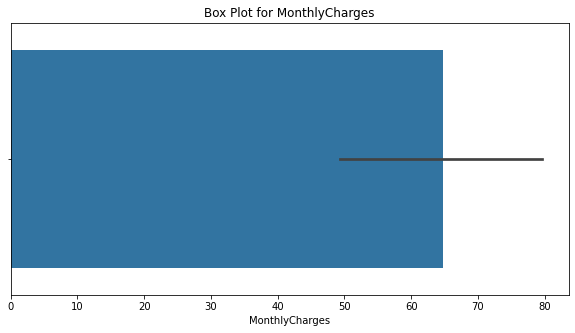

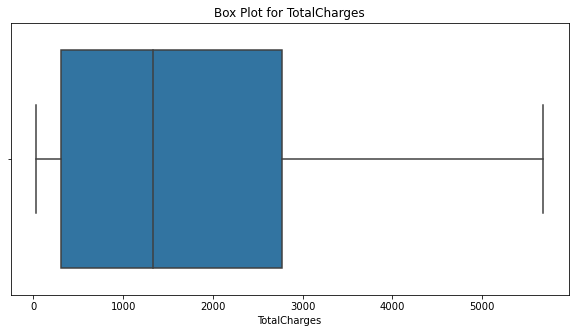

In [19]:
#handling outliers 
#for monthlycharges and totalcharges 

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='MonthlyCharges')
plt.title("Box Plot for MonthlyCharges")
plt.show()

# Box plot for TotalCharges
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='TotalCharges')
plt.title("Box Plot for TotalCharges")
plt.show()

In [22]:
#Calculate Outliers Using IQR Method

def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column]> upper_bound)]
    return outliers


outliers_monthly = find_outliers(df, 'MonthlyCharges')
outliers_total = find_outliers(df, 'TotalCharges')

print("Outliers in MonthlyCharges:\n", outliers_monthly)
print("Outliers in TotalCharges:\n", outliers_total)

Outliers in MonthlyCharges:
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Outliers in TotalCharges:
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


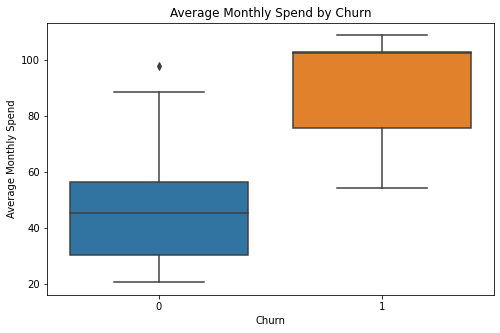

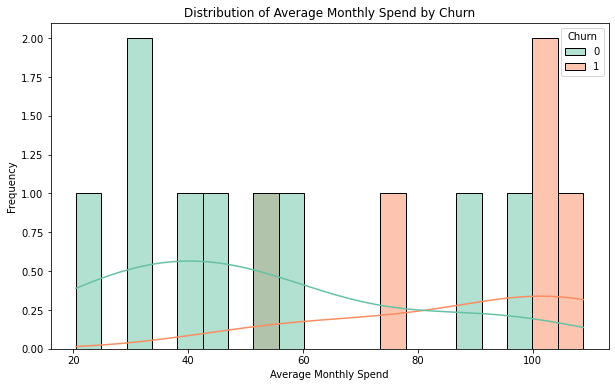

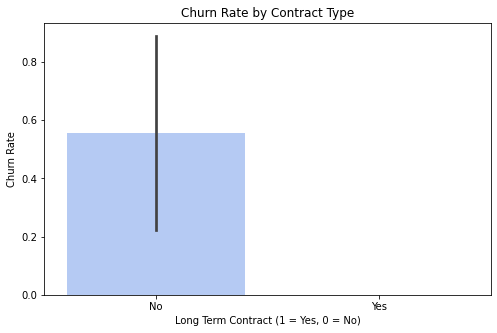

In [25]:
#Feature Engineering 
df['AverageMonthlySpend'] = df['TotalCharges'] / df['tenure']

df['IsLongTermContract'] = df['Contract'].apply(lambda x: 1 if x in ['One year', 'Two year'] else 0)

#visualization

##boxplot for AverageMonthlySpend 
### Highlights whether customers who are higher spenders are  more likely to churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='AverageMonthlySpend', data=df)
plt.title('Average Monthly Spend by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Monthly Spend')
plt.show()

#Histogram for AverageMonthlySpend
## Shows whether high spenders are often categorized among churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AverageMonthlySpend', hue='Churn', bins=20, kde=True, palette='Set2')
plt.title('Distribution of Average Monthly Spend by Churn')
plt.xlabel('Average Monthly Spend')
plt.ylabel('Frequency')
plt.show()

##Bar plot of churn rate by islongtermcontract
### Reveals whether long term contract holders are less likedly to churn
### customers with month to month contraccts have a higher churn rate.. likely to leave 
plt.figure(figsize=(8, 5))
sns.barplot(x='IsLongTermContract', y='Churn', data=df, estimator=lambda x: sum(x) / len(x), palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Long Term Contract (1 = Yes, 0 = No)')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
#normalization if requires 
#can check through visualization (if hist has normality or not)

